<a href="https://colab.research.google.com/github/shelvasha/Notebooks/blob/main/02_Developing_Models_for_Complex_Datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Working with more complex datasets

In [25]:
# Import required packages

import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read in csv
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')

In [3]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [9]:
# Encode non-numeric columns (one-hot) - in pandas the command is .get_dummies()
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


### Exploratory Data Analysis

Mean:  30.663396860986538


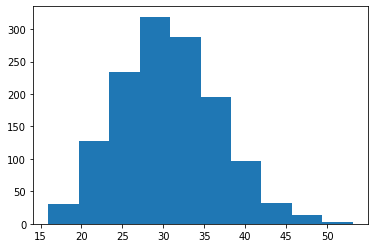

In [20]:
plt.hist(insurance_one_hot["bmi"])
print("Mean: ",insurance_one_hot["bmi"].mean())

Mean:  13270.422265141257


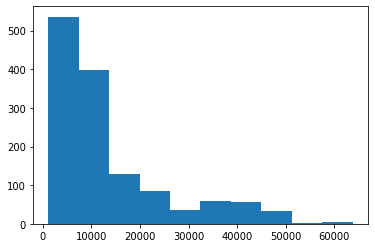

In [21]:
plt.hist(insurance_one_hot["charges"])
print("Mean: ",insurance_one_hot["charges"].mean())

Mean:  39.20702541106129


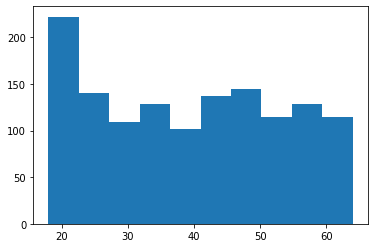

In [22]:
plt.hist(insurance_one_hot["age"])
print("Mean: ",insurance_one_hot["age"].mean())

### Creating the model

In [23]:
# Create X and y

X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [29]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

print("Length of X: ", len(X))
print("Length of X_train: ", len(X_train))
print("Length of X_test: ",len(X_test))

Length of X:  1338
Length of X_train:  1070
Length of X_test:  268


In [104]:
# Building a neural network
tf.random.set_seed(42)

# 1. Create model
insurance_model = tf.keras.Sequential([
      tf.keras.layers.Dense(100),
      tf.keras.layers.Dense(10),
      tf.keras.layers.Dense(1)
])

# 2. Compile
insurance_model.compile(loss="mae", optimizer="Adam", metrics="mae")

# 3. Fit the model
history = insurance_model.fit(X_train, y_train, epochs=200, verbose=0)

In [105]:
# Evaluate the model
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 3491.2961 - mae: 3491.2961


[3491.296142578125, 3491.296142578125]

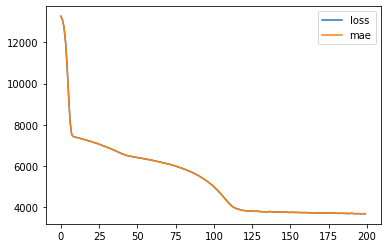

In [106]:
# Plot a history curve
pd.DataFrame(history.history).plot()


### So..... how many epochs?
- Depends
- But TensorFlow has a solution called EarlyStopping Callback, which will cause your model to stop training once it stops improving.

9/9 [==============================] - 0s 1ms/step - loss: 3624.6331 - mae: 3624.6331


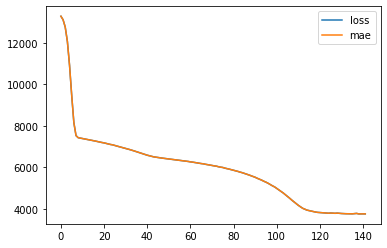

In [107]:
# Building a neural network
tf.random.set_seed(42)

# 1. Create model
insurance_model = tf.keras.Sequential([
      tf.keras.layers.Dense(100),
      tf.keras.layers.Dense(10),
      tf.keras.layers.Dense(1)])

# 2. Compile
insurance_model.compile(loss="mae", optimizer="Adam", metrics="mae")

# 2.5 Callback to stop model training
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

# 3. Fit the model
history = insurance_model.fit(X_train, y_train, epochs=200, verbose=0, callbacks=[callback])

# 4. Evaluate
insurance_model.evaluate(X_test, y_test)

# 5. Plot
pd.DataFrame(history.history).plot()


### Preprocessing Data: Normalization & Standardization

- In terms of neural networks, machine learning prefers normalization.

In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


To prepare the data, we are going to use a few classes from Scikit-Learn.

In [112]:
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age","bmi","children"]),
    (OneHotEncoder(handle_unknown="ignore"),["sex","smoker","region"])
)

# Create X & y values
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

# Fit the column transformer to training data
ct.fit(X_train)

# Transform training
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)


In [117]:
# What does the data look like now?
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [118]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

9/9 [==============================] - 0s 2ms/step - loss: 3171.7632 - mae: 3171.7632


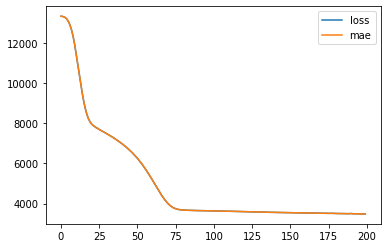

In [119]:
# Again, building a neural network
tf.random.set_seed(42)

# 1. Create model
insurance_model = tf.keras.Sequential([
      tf.keras.layers.Dense(100),
      tf.keras.layers.Dense(10),
      tf.keras.layers.Dense(1)])

# 2. Compile
insurance_model.compile(loss="mae", optimizer="Adam", metrics="mae")

# 2.5 Callback to stop model training
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

# 3. Fit the model
history = insurance_model.fit(X_train_normal, y_train, epochs=200, verbose=0, callbacks=[callback])

# 4. Evaluate
insurance_model.evaluate(X_test_normal, y_test)

# 5. Plot
pd.DataFrame(history.history).plot()